# BUSINESS ANALYTICS OF A BIBYCLES COMPANY

# 1. Introduction

## Report goal
There is fictional cycling company that sells bicycles in different countries around the world. They would like to increase their revenue and improve their business. To do this, they provided a dataset with all their transactions in the years 2013-2014. This dataset includes product-level information about sales, profits, market segments, and geographic distribution.

The main idea is to use these details to gain new insights to create or improve the marketing and sales strategy.

Specifically, it will be analyze:
- the sales trends over time using a line chart to highlight seasonality or trends;
- the sales difference across regions using a heat map or bar chart;
- the top-selling products using visualization charts (pie chart or bar chart);
- the relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression.

## Database description
The database is composed by 700 rows and 16 columns, each row is a sale made:
| Name                | Type       | Description                                        |  Non-Null Count | 
|---------------------|------------|----------------------------------------------------|-----------------|
| Segment             | object     | Market segment to which the sale belongs           | 700 non-null    |
| Country             | object     | Country where the sale was made                    | 700 non-null    | 
| Product             | object     | Type of product sold in the sale                   | 700 non-null    | 
| Discount band       | object     | Discount band size applied in the sale             | 700 non-null    |
| Unit sold           | int64      | Quantity of unit sold in the sale                  | 700 non-null    |
| Manufactoring price | int64      | The production price per unit for the product sold | 700 non-null    |
| Sale price          | int64      | The sale price per unit for the product sold       | 700 non-null    |
| Gross sales         | int64      | Total amount of sales before any discounts         | 700 non-null    |
| Discounts           | int64      | Amount of discount applied                         | 700 non-null    |
| Sales               | int64      | The sale after the discount                        | 700 non-null    |
| COGS                | object     | Cost of Goods Sold                                 | 700 non-null    |
| Profit              | int64      | Profit made, the difference between sales and COGS | 700 non-null    |
| Date                | datetime64 | The date the sale was made                         | 700 non-null    |
| Month number        | int64      | The month name of the sale                         | 700 non-null    |
| Month name          | object     | The month number of the sale                       | 700 non-null    |
| Year                | int64      | The year of the sale                               | 700 non-null    |



# 2. Loading and inspection of the dataset

Import the libraries

In [72]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Data import with API

In [ ]:
# Download latest version
path = kagglehub.dataset_download("atharvaarya25/financials")

print("Path to dataset files:", path)

c:\Users\matza\FinalProject\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\matza\.cache\kagglehub\datasets\atharvaarya25\financials\versions\1


In [24]:
df = pd.read_csv(f"{path}/Financials.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


Dataset overview

In [3]:
# copy of the dataset
df_copy = df.copy(deep=True)

In [25]:
# number or rows and columns
df.shape

(700, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [23]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,2475,260,300,742500,111375,631125,618750,12375,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546,260,300,163800,24570,139230,136500,2730,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368,5,7,9576,1436,8139,6840,1299,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723,10,7,5061,759,4301,3615,686,2014-04-01,4,April,2014
699,Channel Partners,United States of America,VTT,High,1806,250,12,21672,3250,18421,5418,13003,2014-05-01,5,May,2014


# 3. Cleaning of the dataset

Cleaning the column names

In [8]:
# check the column names
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [26]:
# column names with anomalous spaces
columns_whiteSpaceName = df.columns[df.columns.str.startswith(" ") | df.columns.str.endswith(" ")]
columns_whiteSpaceName

Index([' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ',
       ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ',
       ' Profit ', ' Month Name '],
      dtype='object')

In [27]:
# remove white spaces
df.columns = df.columns.str.strip()

Cleaning the column values

In [28]:
# columns type
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

In [10]:
df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014


In [29]:
# remove $ and space
columns_withDollar = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for col in columns_withDollar:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '')
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].apply(lambda x: x.strip())

df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,-,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,-,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,-,32670.00,21780.00,10890.00,01/06/2014,6,June,2014


In [30]:
# changing Discount column
df['Discounts'] = df['Discounts'].replace('-', 0)

In [31]:
# check again for unusual symbols
for col in columns_withDollar:
    print(f"Check column: {col}")
    print(df[col][df[col].str.contains(r'^\s*$|^-|^\$|\(|\)', na=False)].unique())

Check column: Units Sold
[]
Check column: Manufacturing Price
[]
Check column: Sale Price
[]
Check column: Gross Sales
[]
Check column: Discounts
[]
Check column: Sales
[]
Check column: COGS
[]
Check column: Profit
['-' '(4533.75)' '(3740.00)' '(2981.25)' '(1076.25)' '(880.00)'
 '(1008.75)' '(2217.50)' '(2380.00)' '(6887.50)' '(4968.75)' '(9375.00)'
 '(13173.75)' '(7826.25)' '(6168.75)' '(3727.50)' '(7700.00)' '(5570.00)'
 '(11606.25)' '(17481.25)' '(3543.75)' '(13187.50)' '(5481.25)'
 '(25841.25)' '(11115.00)' '(13530.00)' '(11970.00)' '(14370.00)'
 '(2557.50)' '(18967.50)' '(4342.50)' '(21358.75)' '(4847.50)'
 '(27693.75)' '(12538.75)' '(8286.25)' '(24160.00)' '(21560.00)'
 '(23870.00)' '(17808.75)' '(18663.75)' '(12787.50)' '(35262.50)'
 '(19687.50)' '(35550.00)' '(16142.50)' '(38046.25)' '(14918.75)'
 '(9116.25)' '(33522.50)' '(40617.50)' '(7590.00)']


In [34]:
# change Profit column
df['Profit'] = df['Profit'].str.strip('()')
df['Profit'] = df['Profit'].replace('-', 0)


In [35]:
# change column types
for col in columns_withDollar:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(float)

In [36]:
# Date column in date type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [38]:
df = df.dropna()

# change column types
for col in columns_withDollar:
    if df[col].dtype == 'float':
        df[col] = df[col].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    int64         
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    int64         
 8   Discounts            700 non-null    int64         
 9   Sales                700 non-null    int64         
 10  COGS                 700 non-null    int64         
 11  Profit               700 non-null    int64         
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [40]:
# controll of the values
round(df[columns_withDollar].describe(), 2)

# It seems not to be strange values, cleaning data completed

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,1608.27,96.48,118.43,182759.42,13150.09,169608.77,145475.21,26354.48
std,867.41,108.60,136.78,254262.28,22962.99,236726.46,203865.51,41426.89
min,200.00,3.00,7.00,1799.00,0.00,1655.00,918.00,0.00
25%,905.00,5.00,12.00,17391.75,800.25,15928.00,7490.00,3815.25
50%,1542.50,10.00,20.00,37980.00,2585.00,35539.50,22506.00,11110.50
75%,2228.75,250.00,300.00,279025.00,15956.25,261077.50,245607.50,23756.00
max,4492.00,260.00,350.00,1207500.00,149677.00,1159200.00,950625.00,262200.00


# 4. Exploratory Data Analysis

In [21]:
df_copy2 = df.copy(deep=True)

In [41]:
# set Date column as index
df = df.set_index("Date")

In [42]:
df = df.drop(["Month Number", "Month Name", "Year"], axis=1)

Descriptive statistics

- categorical variables

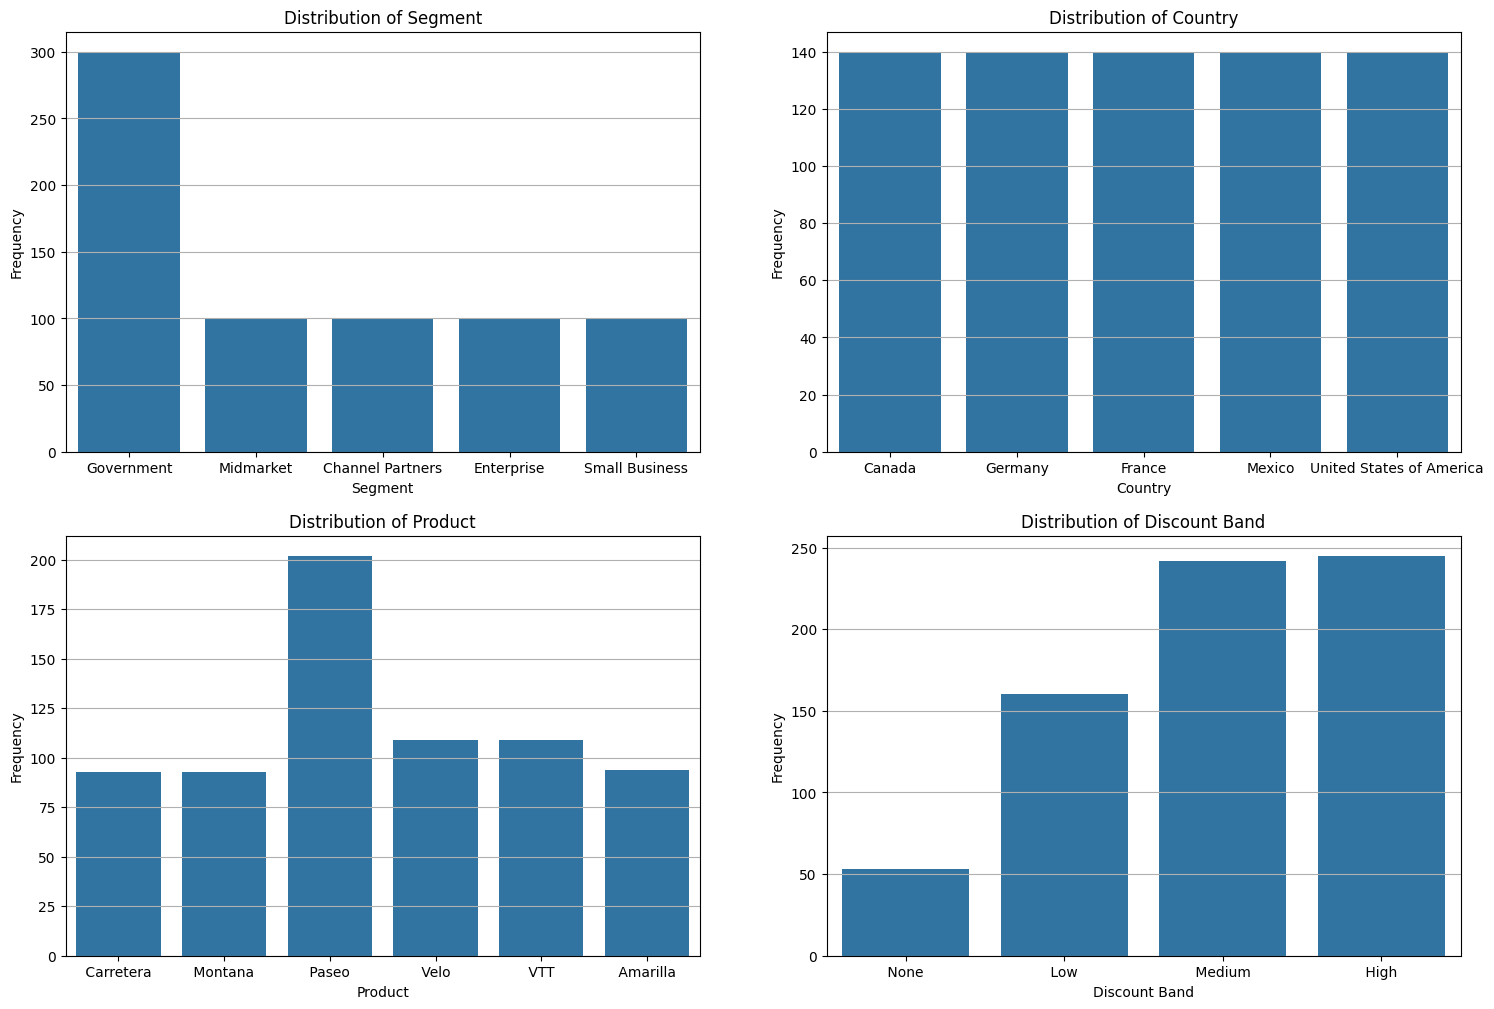

In [44]:
# selection of the categorical variables
categorical_columns = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

# barplot for the categorical vars
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

In [45]:
# percentage table
def percentageTable(col): 
    percentage = round(df[col].value_counts(normalize=True)*100, 2)
    
    table = pd.DataFrame({
        'Category': percentage.index,
        'Percentage (%)': percentage.values
        })
    print(f"Variable {col}")
    print(table.to_string(index=False))
    print("\n")

In [46]:
# Segment
percentageTable('Segment')

Variable Segment
        Category  Percentage (%)
      Government           42.86
       Midmarket           14.29
Channel Partners           14.29
      Enterprise           14.29
  Small Business           14.29




In [47]:
# Country
percentageTable('Country')

Variable Country
                Category  Percentage (%)
                  Canada            20.0
                 Germany            20.0
                  France            20.0
                  Mexico            20.0
United States of America            20.0




In [48]:
# Product
percentageTable('Product')

Variable Product
   Category  Percentage (%)
     Paseo            28.86
      Velo            15.57
       VTT            15.57
  Amarilla            13.43
   Montana            13.29
 Carretera            13.29




In [49]:
# Discount Band
percentageTable('Discount Band')

Variable Discount Band
Category  Percentage (%)
   High            35.00
 Medium            34.57
    Low            22.86
   None             7.57




- quantitative variables

In [50]:
# selection of the quantitative variables
numerical_columns = df.select_dtypes(include='number').columns

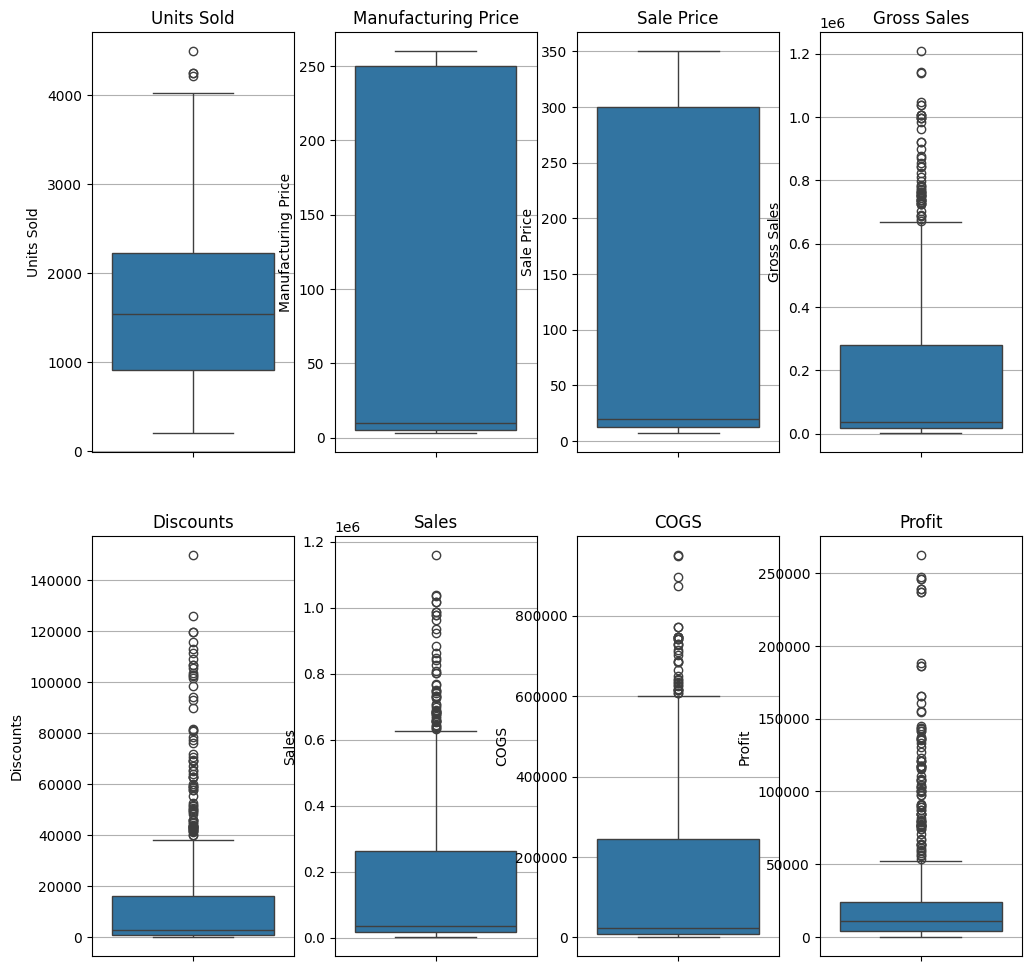

In [51]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.ravel()

#  boxlot of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Boxplot per la variabile corrente
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y')

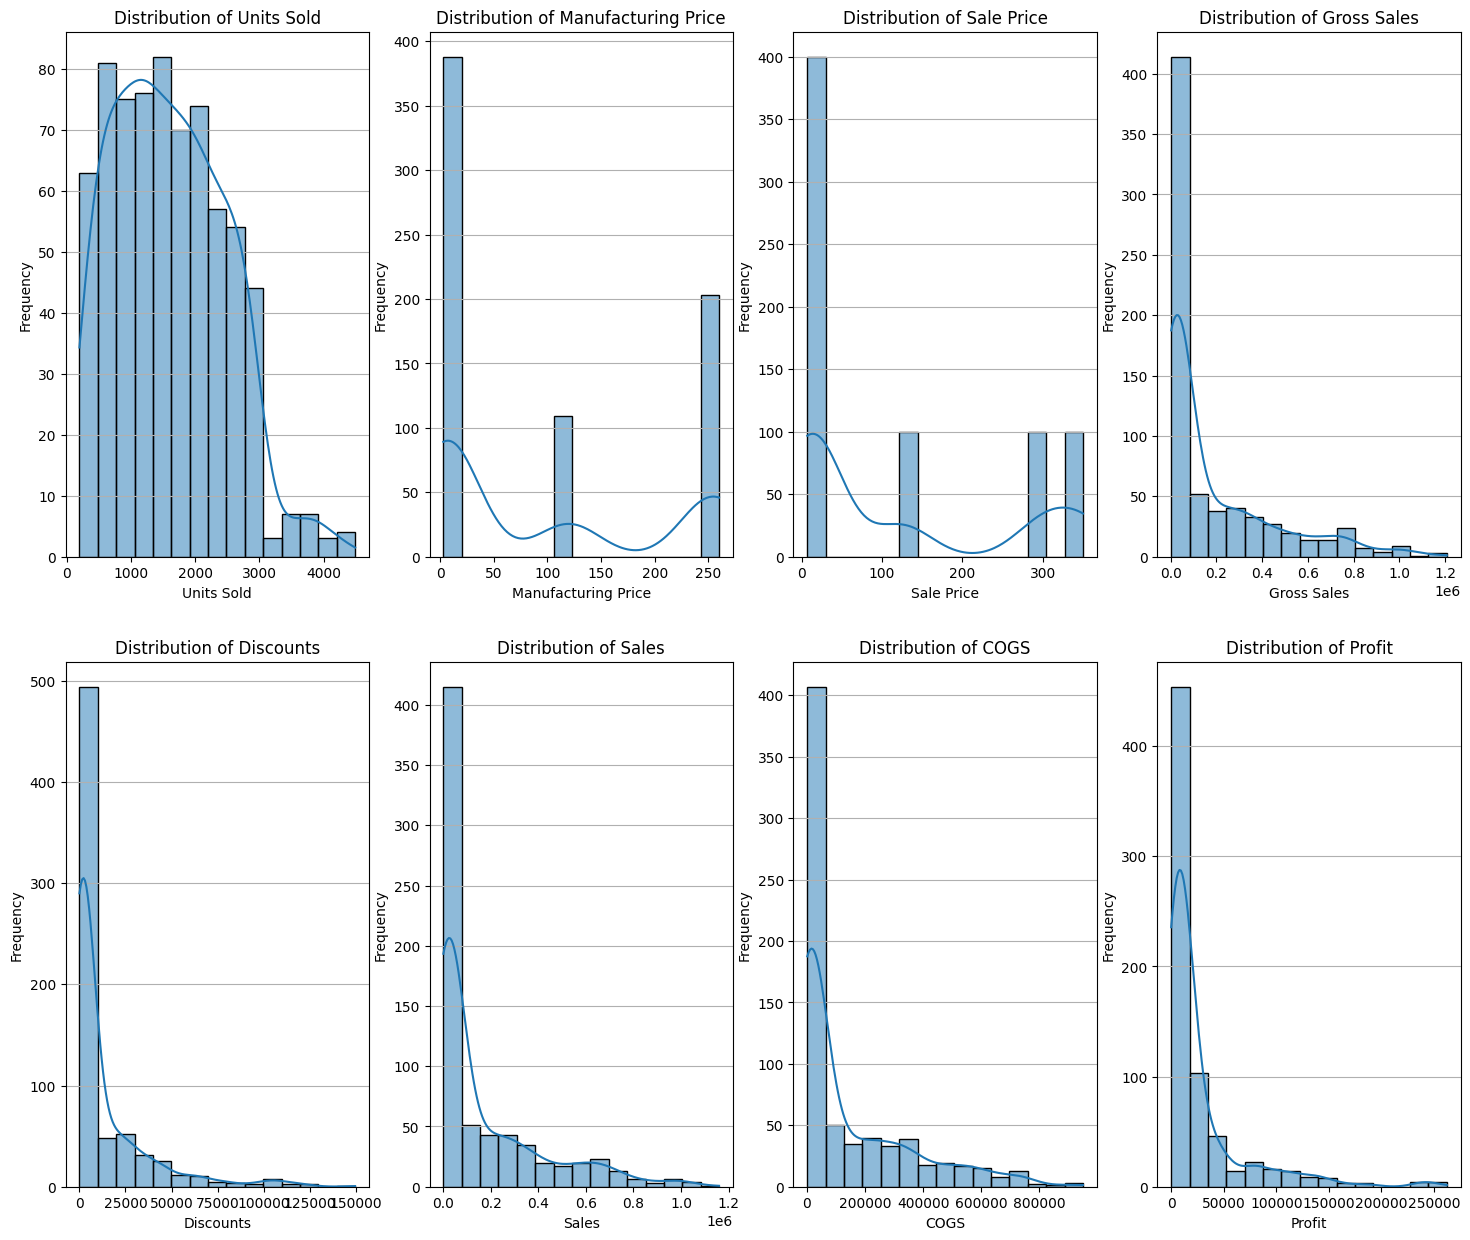

In [52]:
fig, axes = plt.subplots(2, 4, figsize=(18, 15))
axes = axes.ravel()

# histogram and distribution of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=15, ax=axes[i])  # Specifica l'asse
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

# 5. Statistical analysis

sales trends over time using a line chart to highlight seasonality or trends

In [53]:
df.index = pd.to_datetime(df.index)

In [54]:
monthly_sales = df.groupby(df.index.to_period('M'))['Sales'].sum()

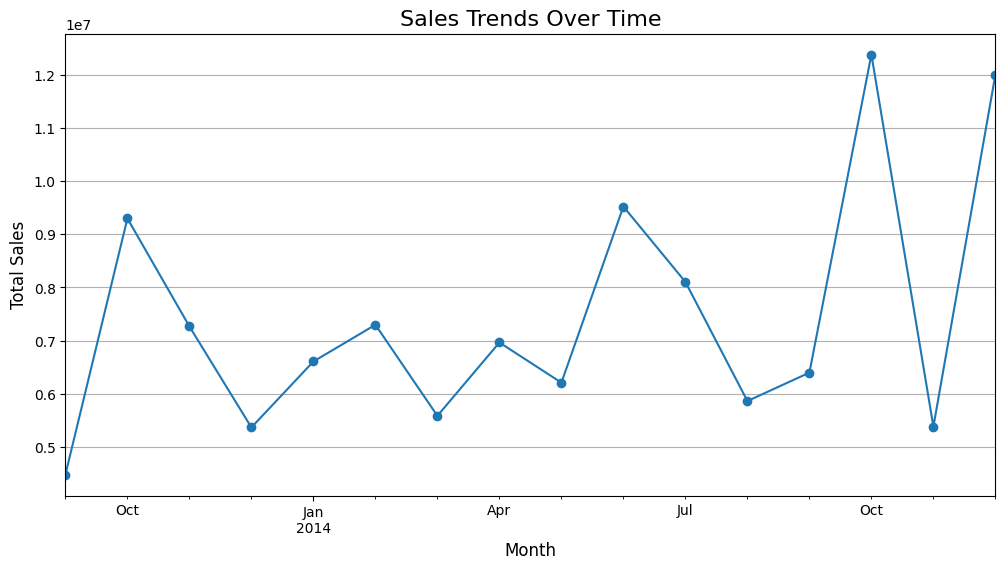

In [55]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Sales Trends Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(axis='y')
plt.show()

sales difference across regions using a heat map or bar chart

In [56]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values()

C:\Users\matza\AppData\Local\Temp\ipykernel_15432\82983858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')


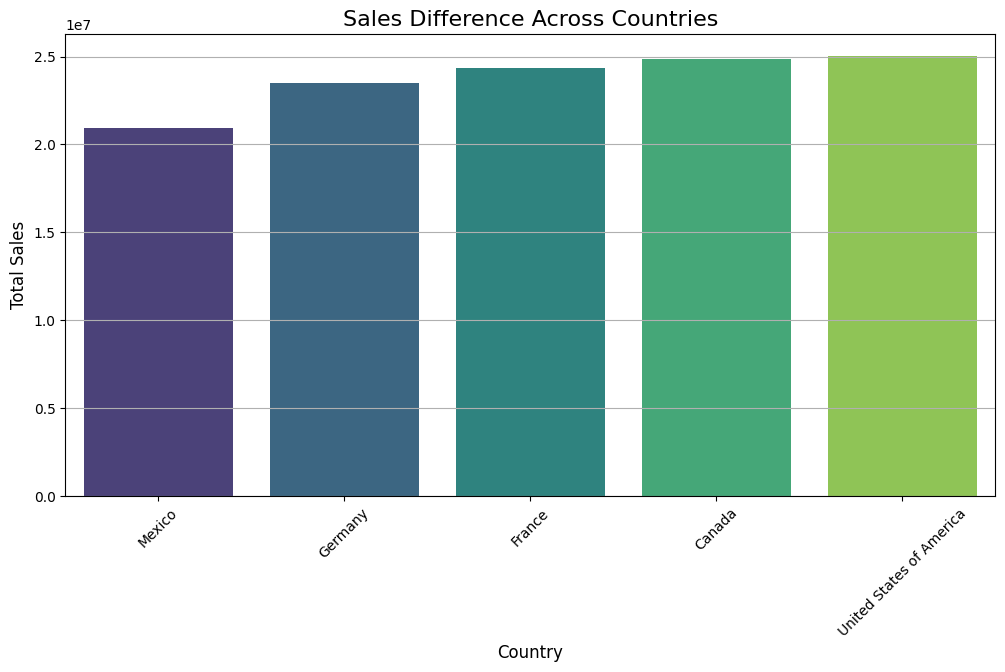

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')
plt.title("Sales Difference Across Countries", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [58]:
regional_sales = df.groupby(['Country', 'Segment'])['Sales'].sum().unstack()

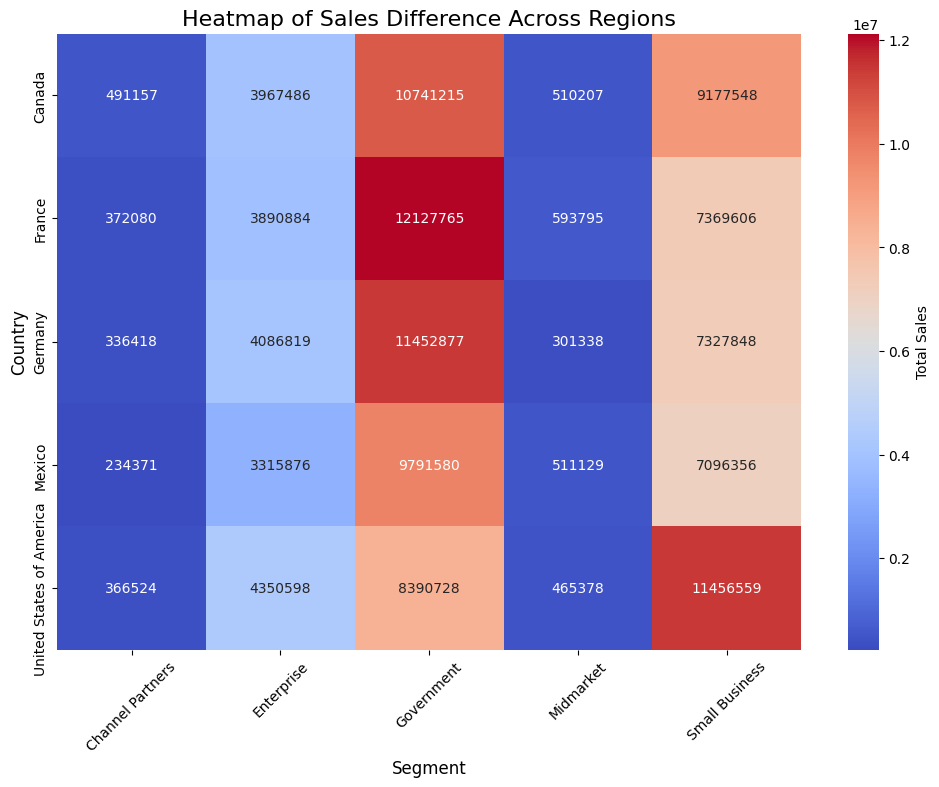

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(regional_sales, annot=True, fmt='.0f', cmap='coolwarm', cbar_kws={'label': 'Total Sales'})
plt.title("Heatmap of Sales Difference Across Regions", fontsize=16)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.show()

top-selling products using visualization charts (pie chart or bar chart)

In [60]:
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

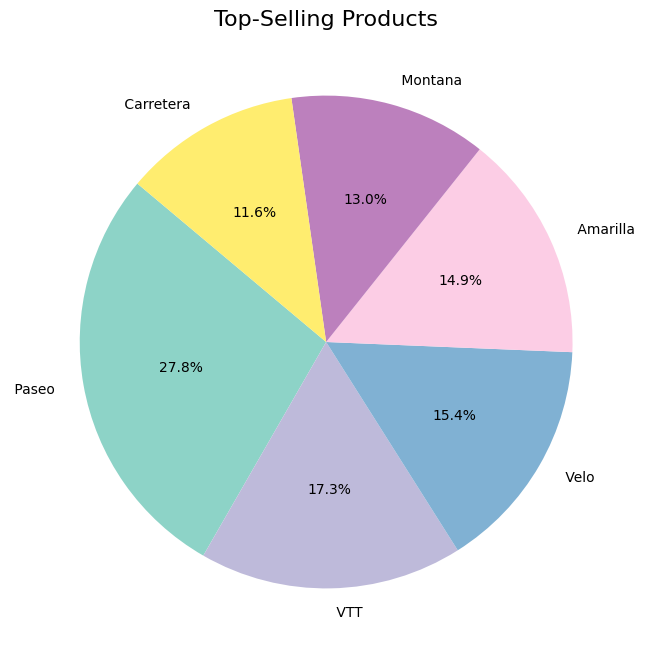

In [61]:
plt.figure(figsize=(8, 8))
product_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Top-Selling Products", fontsize=16)
plt.ylabel("")
plt.show()

relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression

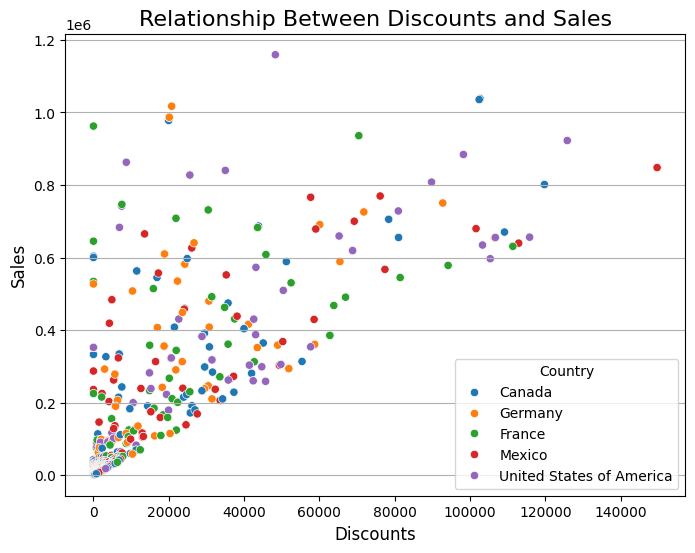

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discounts', y='Sales', data=df, hue='Country', palette='tab10')
plt.title("Relationship Between Discounts and Sales", fontsize=16)
plt.xlabel("Discounts", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(axis='y')
plt.show()

In [64]:
X = df[['Discounts']]
y = df['Sales']

In [65]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [66]:
df['Sales_Predicted'] = model.predict(X)

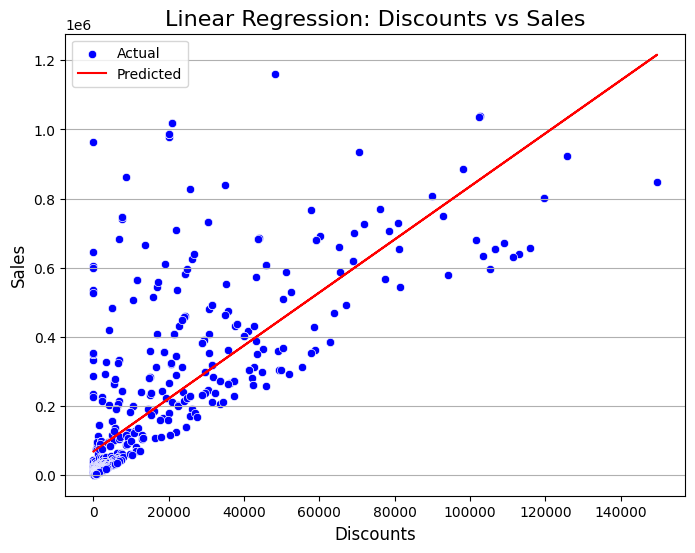

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discounts', y='Sales', data=df, label='Actual', color='blue')
plt.plot(df['Discounts'], df['Sales_Predicted'], color='red', label='Predicted')
plt.title("Linear Regression: Discounts vs Sales", fontsize=16)
plt.xlabel("Discounts", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend()
plt.grid(axis='y')
plt.show()

In [69]:
X = sm.add_constant(X)

In [70]:
model = sm.OLS(y, X).fit()

In [71]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     862.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          4.59e-124
Time:                        18:05:43   Log-Likelihood:                -9373.4
No. Observations:                 700   AIC:                         1.875e+04
Df Residuals:                     698   BIC:                         1.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.882e+04   6901.873      9.972      0.0

# 6. Conclusion

From the analyses performed in the previous sections, it can be noticed that ....